In [1]:
from IPython import display

from pprint import pprint, pformat
from functools import reduce, cmp_to_key

from ginv import *

In [2]:
t = timer()
t.start()
fac = 1
for i in range(1, 50000):
    fac *= i
t.stop()
print(t)

userTime: 0.65, sysTime: 0.00, realTime: 0.64


In [3]:
print("maxMemory -", allocator.maxMemory())
print("currMemory -", allocator.currMemory())
print(allocator.GC_timer())

maxMemory - 0
currMemory - 0
GC userTime: 0.00, sysTime: 0.00, realTime: 0.00


In [4]:
allocator.set_limit_memory(100*1024*1024)

In [5]:
p = randpermutation(4)
s = set()
for k in range(4*3*2*1):
    s.add(tuple(p[i] for i in range(4)))
    p.next()
pprint(s)
print(len(s), 4*3*2*1)

{(0, 1, 2, 3),
 (0, 1, 3, 2),
 (0, 2, 3, 1),
 (0, 3, 1, 2),
 (0, 3, 2, 1),
 (1, 0, 2, 3),
 (1, 0, 3, 2),
 (1, 2, 0, 3),
 (1, 3, 0, 2),
 (2, 0, 1, 3),
 (2, 0, 3, 1),
 (2, 1, 0, 3),
 (2, 3, 0, 1),
 (2, 3, 1, 0),
 (3, 0, 1, 2),
 (3, 1, 0, 2),
 (3, 1, 2, 0)}
17 24


In [6]:
p = randpermutation(4)
s = set()
for k in range(4*3*2*10):
    s.add(tuple(p[i] for i in range(4)))
    p.next()
pprint(s)
print(len(s), 4*3*2*1)

{(0, 1, 2, 3),
 (0, 1, 3, 2),
 (0, 2, 1, 3),
 (0, 2, 3, 1),
 (0, 3, 1, 2),
 (0, 3, 2, 1),
 (1, 0, 2, 3),
 (1, 0, 3, 2),
 (1, 2, 0, 3),
 (1, 2, 3, 0),
 (1, 3, 0, 2),
 (1, 3, 2, 0),
 (2, 0, 1, 3),
 (2, 0, 3, 1),
 (2, 1, 0, 3),
 (2, 1, 3, 0),
 (2, 3, 0, 1),
 (2, 3, 1, 0),
 (3, 0, 1, 2),
 (3, 0, 2, 1),
 (3, 1, 0, 2),
 (3, 1, 2, 0),
 (3, 2, 0, 1),
 (3, 2, 1, 0)}
24 24


In [7]:
size, pos = 12, 3
r = monom.zero(size, pos)


In [8]:
size, pos = 4, -1
vars = [monom.variable(i, size, pos) for i in range(size)]
pprint(vars)
print((vars[1]**3*vars[2]).divisiable(vars[2]*vars[1]))
(vars[1]**3*vars[2])/(vars[2]*vars[1])

[[-1 1:1 0 0 0], [-1 1:0 1 0 0], [-1 1:0 0 1 0], [-1 1:0 0 0 1]]
True


[-1 2:0 2 0 0]

In [9]:
for k in range(3):
    p.next()
    print(tuple(p[i] for i in range(4)), ":")
    print([v.permutation(p) for v in vars])

(2, 0, 1, 3) :
[[-1 1:0 1 0 0], [-1 1:0 0 1 0], [-1 1:1 0 0 0], [-1 1:0 0 0 1]]
(0, 3, 2, 1) :
[[-1 1:1 0 0 0], [-1 1:0 0 0 1], [-1 1:0 0 1 0], [-1 1:0 1 0 0]]
(2, 0, 3, 1) :
[[-1 1:0 1 0 0], [-1 1:0 0 0 1], [-1 1:1 0 0 0], [-1 1:0 0 1 0]]


In [10]:
size, deg1, deg2 = 4, 1, 5
monom.rand_init(size, deg1, deg2)
m = reduce(lambda x, y: x*y, [monom.next() for i in range(3)])
print(m)
print(repr(m))
print("degree -", m.degree())
print("   pos -", m.pos())
print("*".join("x_%d**%d" % (i, m[i]) for i in range(len(m))))
print([d for d in m])

[1 2 1 2]
[-1 6:1 2 1 2]
degree - 6
   pos - -1
x_0**1*x_1**2*x_2**1*x_3**2
[1, 2, 1, 2]


In [11]:
monom.rand_init(6, 2, 9)
for i in range(5):
    m = monom.next()
    print(m**2)

[2 4 0 0 0 0]
[2 0 4 4 0 2]
[2 0 4 0 4 0]
[0 0 0 4 0 2]
[0 0 0 0 4 2]


In [12]:
monom.rand_init(10, 2, 9)
for i in range(-1, 5):
    m = monom.next()
    m.setPos(i)
    print(m)

[3 1 1 1 0 1 1 0 0 1]
[0:0 1 0 0 0 1 0 0 0 0]
[1:2 0 1 0 2 0 2 1 0 0]
[2:0 1 1 1 0 1 1 1 1 1]
[3:0 2 1 1 1 0 0 2 0 1]
[4:1 0 0 2 0 0 0 4 0 1]


In [13]:
monom.rand_init(10, 2, 12)
lst = [monom.next().setPos(i) for i in range(-1, 7)]
print("lex:")
pprint(sorted(lst, key=cmp_to_key(lambda x, y: x.lex(y))))
print("deglex:")
pprint(sorted(lst, key=cmp_to_key(lambda x, y: x.deglex(y))))
print("alex:")
pprint(sorted(lst, key=cmp_to_key(lambda x, y: x.alex(y))))
print("POT:")
pprint(sorted(lst, key=lambda x: x.pos()))

lex:
[[3 8:0 0 0 2 2 0 0 1 2 1],
 [1 5:0 0 1 0 0 0 2 0 1 1],
 [0 4:0 1 0 0 1 0 1 0 0 1],
 [5 5:0 1 1 0 0 0 0 0 0 3],
 [6 8:1 0 1 0 1 0 0 2 2 1],
 [2 10:1 0 2 4 1 0 1 0 1 0],
 [-1 5:1 1 0 1 0 0 0 1 1 0],
 [4 12:2 2 0 1 0 3 1 2 1 0]]
deglex:
[[0 4:0 1 0 0 1 0 1 0 0 1],
 [5 5:0 1 1 0 0 0 0 0 0 3],
 [1 5:0 0 1 0 0 0 2 0 1 1],
 [-1 5:1 1 0 1 0 0 0 1 1 0],
 [6 8:1 0 1 0 1 0 0 2 2 1],
 [3 8:0 0 0 2 2 0 0 1 2 1],
 [2 10:1 0 2 4 1 0 1 0 1 0],
 [4 12:2 2 0 1 0 3 1 2 1 0]]
alex:
[[4 12:2 2 0 1 0 3 1 2 1 0],
 [2 10:1 0 2 4 1 0 1 0 1 0],
 [3 8:0 0 0 2 2 0 0 1 2 1],
 [6 8:1 0 1 0 1 0 0 2 2 1],
 [1 5:0 0 1 0 0 0 2 0 1 1],
 [5 5:0 1 1 0 0 0 0 0 0 3],
 [-1 5:1 1 0 1 0 0 0 1 1 0],
 [0 4:0 1 0 0 1 0 1 0 0 1]]
POT:
[[-1 5:1 1 0 1 0 0 0 1 1 0],
 [0 4:0 1 0 0 1 0 1 0 0 1],
 [1 5:0 0 1 0 0 0 2 0 1 1],
 [2 10:1 0 2 4 1 0 1 0 1 0],
 [3 8:0 0 0 2 2 0 0 1 2 1],
 [4 12:2 2 0 1 0 3 1 2 1 0],
 [5 5:0 1 1 0 0 0 0 0 0 3],
 [6 8:1 0 1 0 1 0 0 2 2 1]]


In [14]:
pls = [poly_int.to_monom("TOP", "lex", v) for v in vars]
pprint(pls)

[[-1 1:1 0 0 0]*0x1 + ...,
 [-1 1:0 1 0 0]*0x1 + ...,
 [-1 1:0 0 1 0]*0x1 + ...,
 [-1 1:0 0 0 1]*0x1 + ...]


In [15]:
for p in pls:
    print(" + ".join(["%s*%s" % (m, c) for m, c in p]))

[1 0 0 0]*1
[0 1 0 0]*1
[0 0 1 0]*1
[0 0 0 1]*1


In [16]:
for p in pls:
    print(p.order(), p.size())

('TOP', 'lex') 4
('TOP', 'lex') 4
('TOP', 'lex') 4
('TOP', 'lex') 4


In [17]:
print(poly_int.to_monom("TOP", "deglex", vars[0]).comparable(pls[0]))
print(poly_int.to_monom("POT", "lex", vars[0]).comparable(pls[0]))
print(poly_int.to_monom("TOP", "lex", vars[0]).comparable(pls[0]))

False
False
True


In [18]:
r = (12*pls[0] + 1)*(2 - pls[1])*(pls[2] + 3)*(pls[3] - 4)
print(r)
print(" + ".join(["%s*%r" % (m, c) for m, c in r]))

[1 1 1 1]*-12 + ...
[1 1 1 1]*-0xc + [1 1 1 0]*-0x30 + [1 1 0 1]*-0x24 + [1 1 0 0]*-0x90 + [1 0 1 1]*0x18 + [1 0 1 0]*0x60 + [1 0 0 1]*0x48 + [1 0 0 0]*0x120 + [0 1 1 1]*-0x1 + [0 1 1 0]*-0x4 + [0 1 0 1]*-0x3 + [0 1 0 0]*-0xc + [0 0 1 1]*0x2 + [0 0 1 0]*0x8 + [0 0 0 1]*0x6 + [0 0 0 0]*0x18


In [19]:
s = r**2*1289381093812093821098309283
print(" + ".join(["%s*%s" % (m, c) for m, c in s]))

[2 2 2 2]*185670877508941510238156536752 + [2 2 2 1]*1485367020071532081905252294016 + [2 2 2 0]*2970734040143064163810504588032 + [2 2 1 2]*1114025265053649061428939220512 + [2 2 1 1]*8912202120429192491431513764096 + [2 2 1 0]*17824404240858384982863027528192 + [2 2 0 2]*1671037897580473592143408830768 + [2 2 0 1]*13368303180643788737147270646144 + [2 2 0 0]*26736606361287577474294541292288 + [2 1 2 2]*-742683510035766040952626147008 + [2 1 2 1]*-5941468080286128327621009176064 + [2 1 2 0]*-11882936160572256655242018352128 + [2 1 1 2]*-4456101060214596245715756882048 + [2 1 1 1]*-35648808481716769965726055056384 + [2 1 1 0]*-71297616963433539931452110112768 + [2 1 0 2]*-6684151590321894368573635323072 + [2 1 0 1]*-53473212722575154948589082584576 + [2 1 0 0]*-106946425445150309897178165169152 + [2 0 2 2]*742683510035766040952626147008 + [2 0 2 1]*5941468080286128327621009176064 + [2 0 2 0]*11882936160572256655242018352128 + [2 0 1 2]*4456101060214596245715756882048 + [2 0 1 1]*356488

In [20]:
print("s.isZero() -", s.isZero())
print("len(s)     -", len(s))
print("s.degree() -", s.degree())
print("s.norm()   -", s.norm())
print("s.lm()     -", s.lm())
print("s.lc()     -", s.lc())
print("s.isPp()   -", s.isPp())

s.isZero() - False
len(s)     - 81
s.degree() - 8
s.norm()   - 162
s.lm()     - [2 2 2 2]
s.lc()     - 185670877508941510238156536752
s.isPp()   - False


In [21]:
s.pp()
print(" + ".join(["%s*%s" % (m, c) for m, c in s]))
print("s.isPp()   -", s.isPp())

[2 2 2 2]*144 + [2 2 2 1]*1152 + [2 2 2 0]*2304 + [2 2 1 2]*864 + [2 2 1 1]*6912 + [2 2 1 0]*13824 + [2 2 0 2]*1296 + [2 2 0 1]*10368 + [2 2 0 0]*20736 + [2 1 2 2]*-576 + [2 1 2 1]*-4608 + [2 1 2 0]*-9216 + [2 1 1 2]*-3456 + [2 1 1 1]*-27648 + [2 1 1 0]*-55296 + [2 1 0 2]*-5184 + [2 1 0 1]*-41472 + [2 1 0 0]*-82944 + [2 0 2 2]*576 + [2 0 2 1]*4608 + [2 0 2 0]*9216 + [2 0 1 2]*3456 + [2 0 1 1]*27648 + [2 0 1 0]*55296 + [2 0 0 2]*5184 + [2 0 0 1]*41472 + [2 0 0 0]*82944 + [1 2 2 2]*24 + [1 2 2 1]*192 + [1 2 2 0]*384 + [1 2 1 2]*144 + [1 2 1 1]*1152 + [1 2 1 0]*2304 + [1 2 0 2]*216 + [1 2 0 1]*1728 + [1 2 0 0]*3456 + [1 1 2 2]*-96 + [1 1 2 1]*-768 + [1 1 2 0]*-1536 + [1 1 1 2]*-576 + [1 1 1 1]*-4608 + [1 1 1 0]*-9216 + [1 1 0 2]*-864 + [1 1 0 1]*-6912 + [1 1 0 0]*-13824 + [1 0 2 2]*96 + [1 0 2 1]*768 + [1 0 2 0]*1536 + [1 0 1 2]*576 + [1 0 1 1]*4608 + [1 0 1 0]*9216 + [1 0 0 2]*864 + [1 0 0 1]*6912 + [1 0 0 0]*13824 + [0 2 2 2]*1 + [0 2 2 1]*8 + [0 2 2 0]*16 + [0 2 1 2]*6 + [0 2 1 1]*48 +

In [22]:
for i in range(11):
    print(s.reduction(r))

[2 2 2 1]*-576 + ...
[2 2 1 2]*432 + ...
[2 2 1 1]*-1728 + ...
[2 1 2 2]*-288 + ...
[2 1 2 1]*1152 + ...
[2 1 1 2]*-864 + ...
[2 1 1 1]*3456 + ...
[1 2 2 2]*12 + ...
[1 2 2 1]*-48 + ...
[1 2 1 2]*36 + ...
[1 2 1 1]*-144 + ...


In [23]:
basis = janet_poly_int()

In [24]:
print(basis.comparable(poly_int.to_monom("TOP", "deglex", vars[0])))

True


In [25]:
basis.push(r)
print(basis.comparable(poly_int.to_monom("TOP", "deglex", vars[0])))

False


In [26]:
basis.push(s)
basis.build()
len(basis)

1

In [27]:
for p in basis:
    print(p)
    print(" + ".join(["%s*%s" % (m, c) for m, c in p.poly()]))

[1 1 1 1][1 1 1 1][    ]
[1 1 1 1]*-12 + [1 1 1 0]*-48 + [1 1 0 1]*-36 + [1 1 0 0]*-144 + [1 0 1 1]*24 + [1 0 1 0]*96 + [1 0 0 1]*72 + [1 0 0 0]*288 + [0 1 1 1]*-1 + [0 1 1 0]*-4 + [0 1 0 1]*-3 + [0 1 0 0]*-12 + [0 0 1 1]*2 + [0 0 1 0]*8 + [0 0 0 1]*6 + [0 0 0 0]*24


In [28]:
size = 5
x = [poly_int.to_monom("TOP", "deglex", monom.variable(i, size, -1)) for i in range(size)]

In [29]:
q = [reduce(lambda x, y: x+y, 
    [x[i] for i in range(size)])]
q.append(reduce(lambda x, y: x+y, 
    [x[i]*x[(i+1) % size] for i in range(size)]))
q.append(reduce(lambda x, y: x+y, 
    [x[i]*x[(i+1) % size]*x[(i+2) % size] for i in range(size)]))
q.append(reduce(lambda x, y: x+y, 
    [x[i]*x[(i+1) % size]*x[(i+2) % size]*x[(i+3) % size] for i in range(size)]))
q.append(reduce(lambda x, y: x*y, 
    [x[i] for i in range(size)]) - 1)

In [30]:
for i in range(size):
    print(" + ".join(["%s*%s" % (m, c) for m, c in q[i]]))

[1 0 0 0 0]*1 + [0 1 0 0 0]*1 + [0 0 1 0 0]*1 + [0 0 0 1 0]*1 + [0 0 0 0 1]*1
[1 1 0 0 0]*1 + [0 1 1 0 0]*1 + [0 0 1 1 0]*1 + [1 0 0 0 1]*1 + [0 0 0 1 1]*1
[1 1 1 0 0]*1 + [0 1 1 1 0]*1 + [1 1 0 0 1]*1 + [1 0 0 1 1]*1 + [0 0 1 1 1]*1
[1 1 1 1 0]*1 + [1 1 1 0 1]*1 + [1 1 0 1 1]*1 + [1 0 1 1 1]*1 + [0 1 1 1 1]*1
[1 1 1 1 1]*1 + [0 0 0 0 0]*1


In [31]:
cyclic5 = janet_poly_int()
for i in range(size):
    cyclic5.push(q[i])
allocator.set_limit_memory(100*1024*1024)
cyclic5.build()
print("len(cyclic5) -", len(cyclic5))
print("cyclic5.maxPos() -", cyclic5.maxPos())
print("cyclic5.timer() -", cyclic5.timer())
print("cyclic5.reduction() -", cyclic5.reduction())
print("cyclic5.maxEqualLm() -", cyclic5.maxEqualLm())
print("cyclic5.critI() -", cyclic5.critI())
print("cyclic5.critII() -", cyclic5.critII())
print("cyclic5.isZeroNf() -", cyclic5.isZeroNf())
    
print("maxMemory -", allocator.maxMemory())
print("currMemory -", allocator.currMemory())
print(allocator.GC_timer())

len(cyclic5) - 50
cyclic5.maxPos() - -1
cyclic5.timer() - userTime: 0.01, sysTime: 0.00, realTime: 0.02
cyclic5.reduction() - 1336
cyclic5.maxEqualLm() - 18
cyclic5.critI() - 54
cyclic5.critII() - 11
cyclic5.isZeroNf() - 86
maxMemory - 1540096
currMemory - 1204224
GC userTime: 0.00, sysTime: 0.00, realTime: 0.00


In [32]:
for p in cyclic5:
    print(p)
    print(" + ".join(["%s*%s" % (m, c) for m, c in p.poly()]))

[1 0 0 0 0][1 0 0 0 0][     ]
[1 0 0 0 0]*1 + [0 1 0 0 0]*1 + [0 0 1 0 0]*1 + [0 0 0 1 0]*1 + [0 0 0 0 1]*1
[0 2 0 0 0][0 2 0 0 0][*    ]
[0 2 0 0 0]*-1 + [0 1 0 1 0]*-1 + [0 0 1 1 0]*1 + [0 1 0 0 1]*-2 + [0 0 1 0 1]*-1 + [0 0 0 0 2]*-1
[0 0 3 0 0][0 0 3 0 0][*****]
[0 0 3 0 0]*-1 + [0 1 1 1 0]*-1 + [0 1 0 2 0]*2 + [0 0 1 2 0]*1 + [0 0 0 3 0]*1 + [0 0 2 0 1]*-3 + [0 1 0 1 1]*2 + [0 0 1 1 1]*2 + [0 0 0 2 1]*3 + [0 1 0 0 2]*-3 + [0 0 1 0 2]*-3 + [0 0 0 1 2]*2 + [0 0 0 0 3]*-2
[0 1 2 0 0][0 1 2 0 0][**   ]
[0 1 2 0 0]*-1 + [0 1 1 1 0]*1 + [0 0 2 1 0]*-1 + [0 0 2 0 1]*1 + [0 1 0 1 1]*-1 + [0 0 1 1 1]*-1 + [0 0 0 2 1]*-1 + [0 1 0 0 2]*1 + [0 0 1 0 2]*2 + [0 0 0 1 2]*-1 + [0 0 0 0 3]*1
[0 0 3 0 1][0 0 3 0 0][*****]
[0 0 3 0 1]*-1 + [0 1 1 1 1]*-1 + [0 1 0 2 1]*2 + [0 0 1 2 1]*1 + [0 0 0 3 1]*1 + [0 0 2 0 2]*-3 + [0 1 0 1 2]*2 + [0 0 1 1 2]*2 + [0 0 0 2 2]*3 + [0 1 0 0 3]*-3 + [0 0 1 0 3]*-3 + [0 0 0 1 3]*2 + [0 0 0 0 4]*-2
[0 0 0 4 0][0 0 0 4 0][*****]
[0 0 0 4 0]*1 + [0 1 1 1 1]*14 + [0 0 2

[0 1 1 0 5][0 1 1 0 5][**** ]
[0 1 1 0 5]*-1 + [0 0 1 0 6]*-3 + [0 0 0 0 7]*-1 + [0 1 1 0 0]*-1 + [0 0 1 0 1]*-3 + [0 0 0 0 2]*-1
[0 0 0 3 4][0 0 0 3 4][**** ]
[0 0 0 3 4]*5 + [0 0 0 2 5]*11 + [0 0 1 0 6]*9 + [0 0 0 1 6]*2 + [0 0 0 0 7]*3 + [0 1 1 0 0]*10 + [0 0 2 0 0]*10 + [0 1 0 1 0]*-10 + [0 0 1 1 0]*5 + [0 0 0 2 0]*-4 + [0 0 1 0 1]*24 + [0 0 0 1 1]*2 + [0 0 0 0 2]*-7
[0 0 1 2 4][0 0 1 2 4][**** ]
[0 0 1 2 4]*-5 + [0 0 0 2 5]*-6 + [0 0 1 0 6]*-53 + [0 0 0 1 6]*-1 + [0 0 0 0 7]*-20 + [0 1 0 1 0]*-5 + [0 0 1 1 0]*-5 + [0 0 0 2 0]*-6 + [0 1 0 0 1]*5 + [0 0 1 0 1]*-53 + [0 0 0 1 1]*-1 + [0 0 0 0 2]*-20
[0 1 0 2 4][0 1 0 2 4][**** ]
[0 1 0 2 4]*10 + [0 0 0 2 5]*-9 + [0 0 1 0 6]*-46 + [0 0 0 1 6]*-3 + [0 0 0 0 7]*-17 + [0 1 1 0 0]*-10 + [0 0 2 0 0]*-10 + [0 1 0 1 0]*10 + [0 0 1 1 0]*-10 + [0 0 0 2 0]*1 + [0 1 0 0 1]*10 + [0 0 1 0 1]*-56 + [0 0 0 1 1]*-3 + [0 0 0 0 2]*3
[0 0 0 4 3][0 0 0 4 3][**** ]
[0 0 0 4 3]*10 + [0 0 2 1 4]*-10 + [0 0 0 2 5]*-39 + [0 0 1 0 6]*260 + [0 0 0 1 6]*-7 + [0 

In [33]:
print(cyclic5.maxPos())
cyclic5.janet(-1).draw("pdf", "./cyclic5.pdf")
cyclic5.janet(-1).draw("png", "./cyclic5.png")
print("cyclic5.janet(-1).size() -", cyclic5.janet(-1).size())
cyclic5.janet(-1).HilbertPoly()

-1
cyclic5.janet(-1).size() - 50


['70', '0', '0', '0', '0', '0']

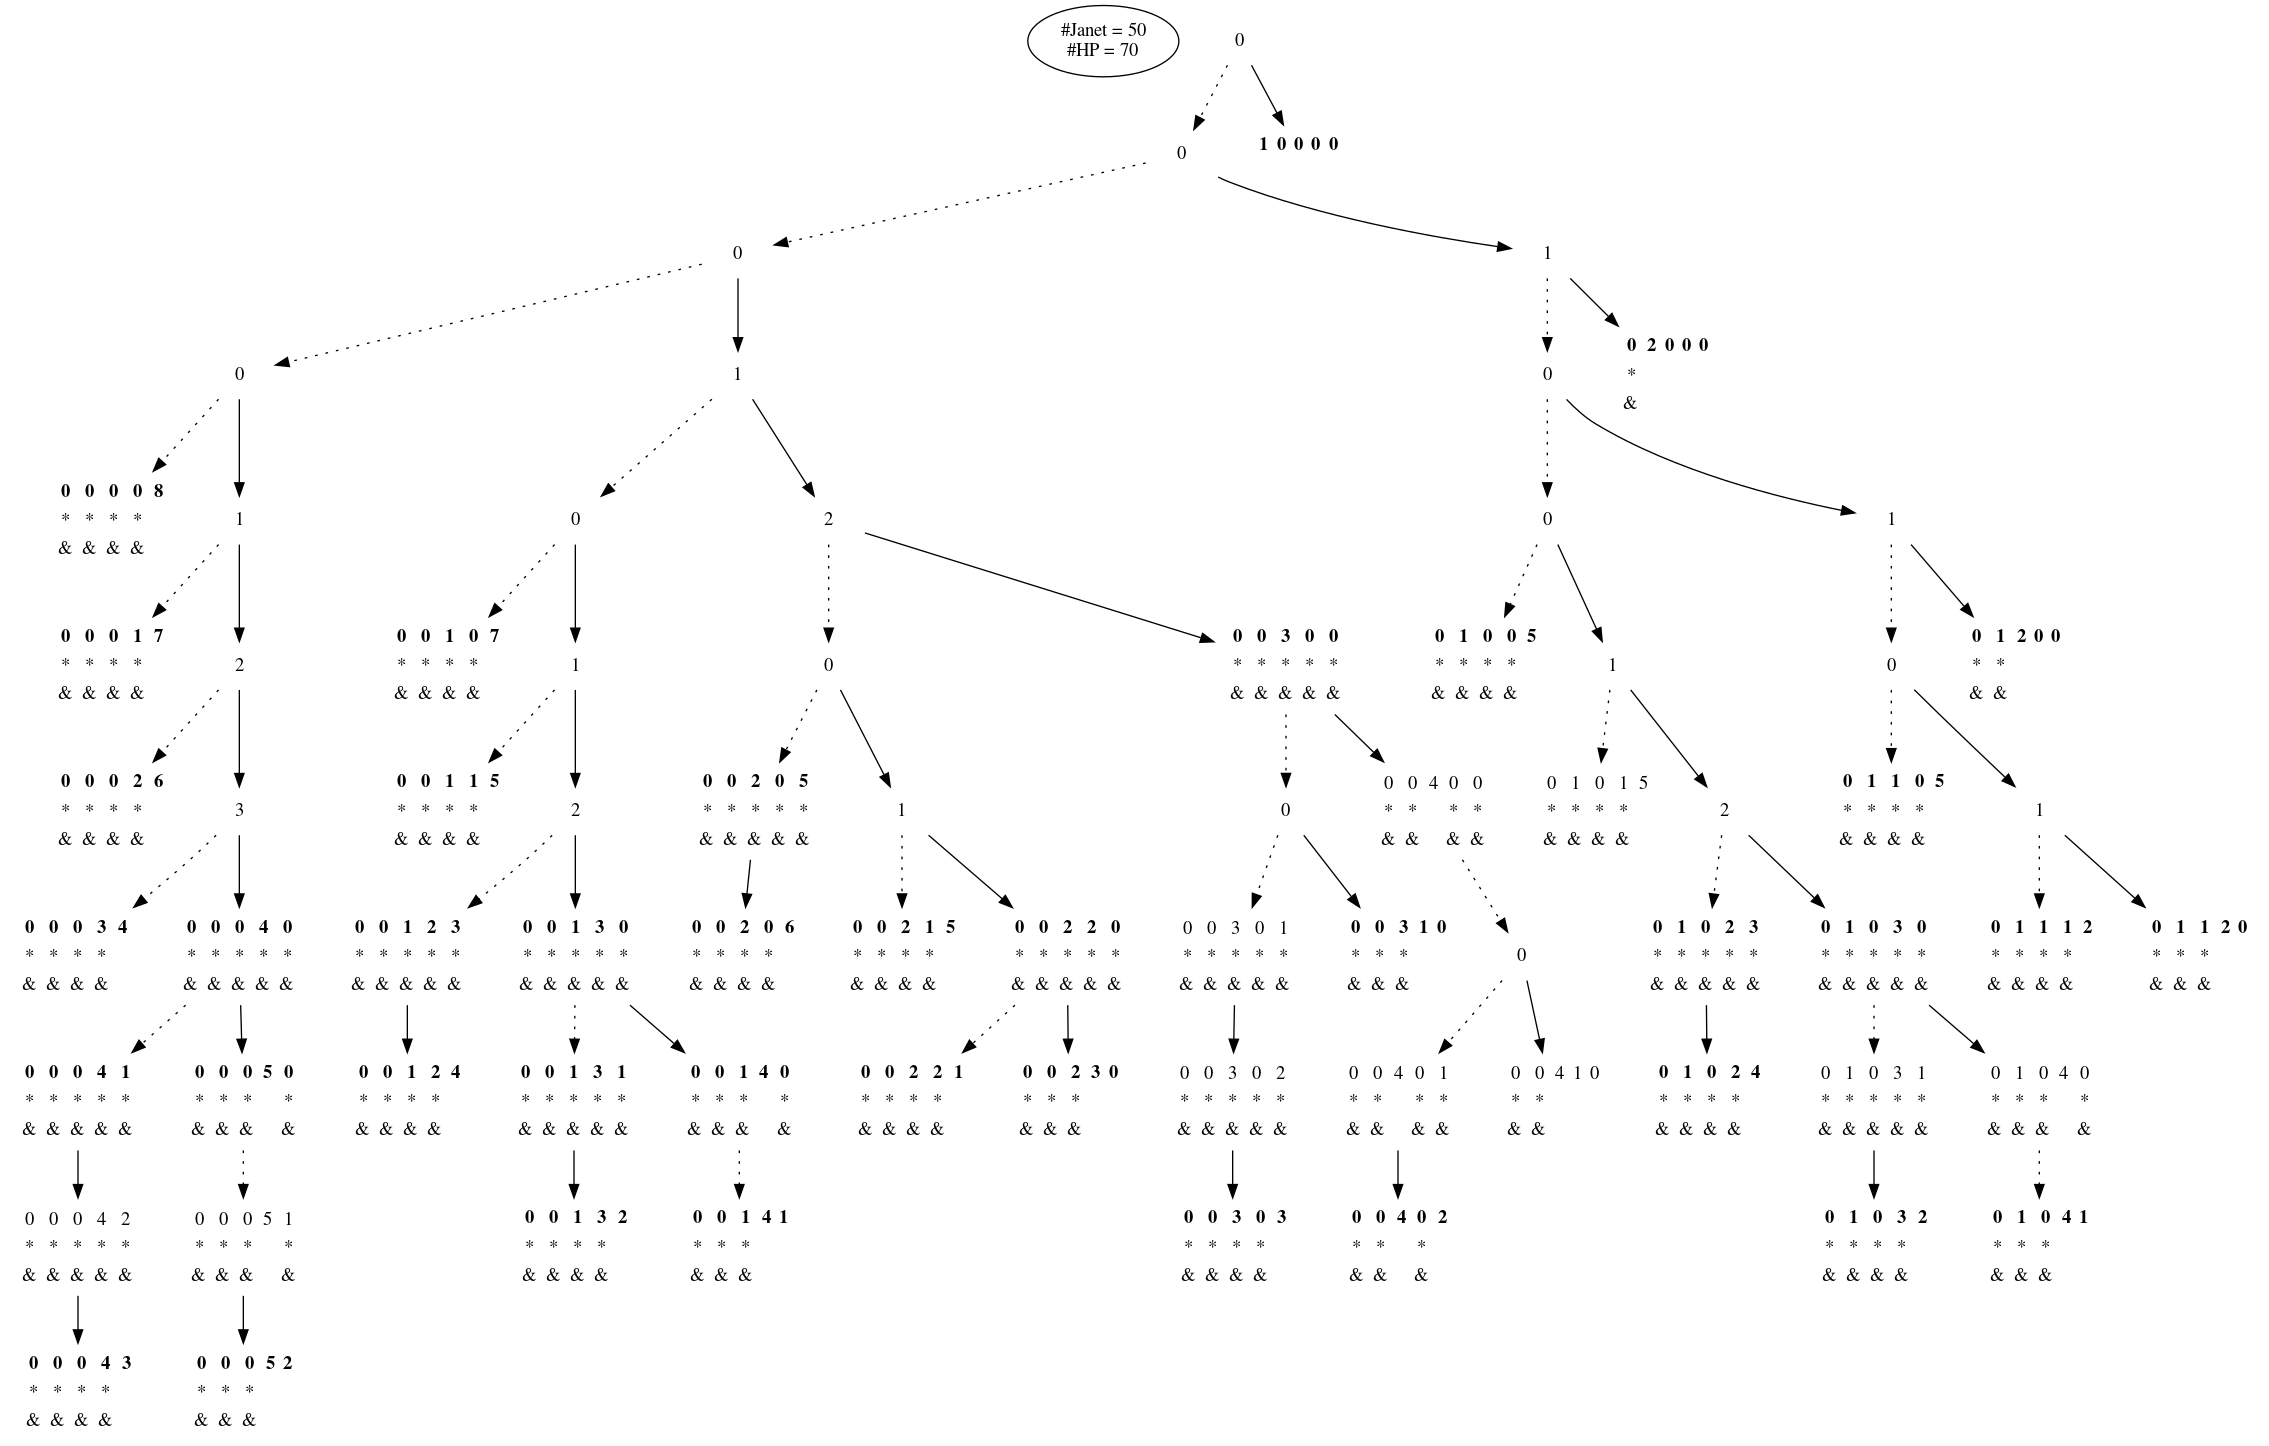

In [34]:
display.Image("./cyclic5.png")

In [35]:
p = cyclic5.nf((x[0] + 1)**3)
print(" + ".join(["%s*%s" % (m, c) for m, c in p]))

[0 1 1 1 0]*6 + [0 0 2 1 0]*3 + [0 1 0 2 0]*3 + [0 0 1 2 0]*6 + [0 0 0 3 0]*2 + [0 1 1 0 1]*-1 + [0 0 1 1 1]*4 + [0 0 0 2 1]*3 + [0 0 1 0 2]*2 + [0 0 0 0 3]*1 + [0 1 1 0 0]*-6 + [0 0 2 0 0]*-3 + [0 1 0 1 0]*-3 + [0 0 1 1 0]*-9 + [0 0 0 2 0]*-3 + [0 0 1 0 1]*-3 + [0 0 0 1 1]*-6 + [0 1 0 0 0]*3 + [0 0 1 0 0]*3 + [0 0 0 1 0]*3 + [0 0 0 0 1]*3 + [0 0 0 0 0]*-1


In [36]:
p = cyclic5.nf(x[2]*x[4])
print(" + ".join(["%s*%s" % (m, c) for m, c in p]))

[0 0 1 0 1]*1


In [37]:
size = 10
U6, U5, U4, U3, U2, u6, u5, u4, u3, u2 = [poly_int.to_monom("TOP", "deglex",
    monom.variable(i, size, -1)) for i in range(size)]

In [38]:
Q =[
2*u2 + 2*u3 + 2*u4 + 2*u5 + 2*u6 + 1,
2*U2 + 2*U3 + 2*U4 + 2*U5 + 2*U6 + 1,
- 4*u2*U3 - 4*u2*U4 - 4*u2*U5 - 4*u2*U6 + 2*u2 + 4*u3*U2 - 4*u3*U4 - 4*u3*U5 - 4*u3*U6 + 2*u3 + 4*u4*U2 + 4*u4*U3 - 4*u4*U5 - 4*u4*U6 + 2*u4 + 4*u5*U2 + 4*u5*U3 + 4*u5*U4 - 4*u5*U6 + 2*u5 + 4*u6*U2 + 4*u6*U3 + 4*u6*U4 + 4*u6*U5 + 2*u6 + 1,
4*u2*U3 + 4*u2*U4 + 4*u2*U5 + 4*u2*U6 - 4*u3*U2 + 4*u3*U4 + 4*u3*U5 + 4*u3*U6 - 4*u4*U2 - 4*u4*U3 + 4*u4*U5 + 4*u4*U6 - 4*u5*U2 - 4*u5*U3 - 4*u5*U4 + 4*u5*U6 - 4*u6*U2 - 4*u6*U3 - 4*u6*U4 - 4*u6*U5 + 2*U2 + 2*U3 + 2*U4 + 2*U5 + 2*U6 + 1,
u2*U2 - 1,
u3*U3 - 1,
u4*U4 - 1,
u5*U5 - 1,
u6*U6 - 1,
]

In [39]:
f633 = janet_poly_int()
for q in Q:
    f633.push(q)
allocator.set_limit_memory(100*1024*1024)
f633.build()
print("len -", len(f633))
print("maxPos -", f633.maxPos())
print("timer -", f633.timer())
print("reduction -", f633.reduction())
print("maxEqualLm -", f633.maxEqualLm())
print("critI -", f633.critI())
print("critII -", f633.critII())
print("isZeroNf -", f633.isZeroNf())
    
print("maxMemory -", allocator.maxMemory())
print("currMemory -", allocator.currMemory())
print(allocator.GC_timer())

len - 153
maxPos - -1
timer - userTime: 0.07, sysTime: 0.02, realTime: 0.10
reduction - 3162
maxEqualLm - 13
critI - 399
critII - 17
isZeroNf - 321
maxMemory - 6434816
currMemory - 4186112
GC userTime: 0.00, sysTime: 0.00, realTime: 0.00


In [40]:
print(f633.maxPos())
f633.janet(-1).draw("pdf", "./f633.pdf")
f633.janet(-1).draw("png", "./f633.png")
print("size -", f633.janet(-1).size())
f633.janet(-1).HilbertPoly()

-1
size - 153


['2', '-12', '16', '0', '0', '0', '0', '0', '0', '0', '0']

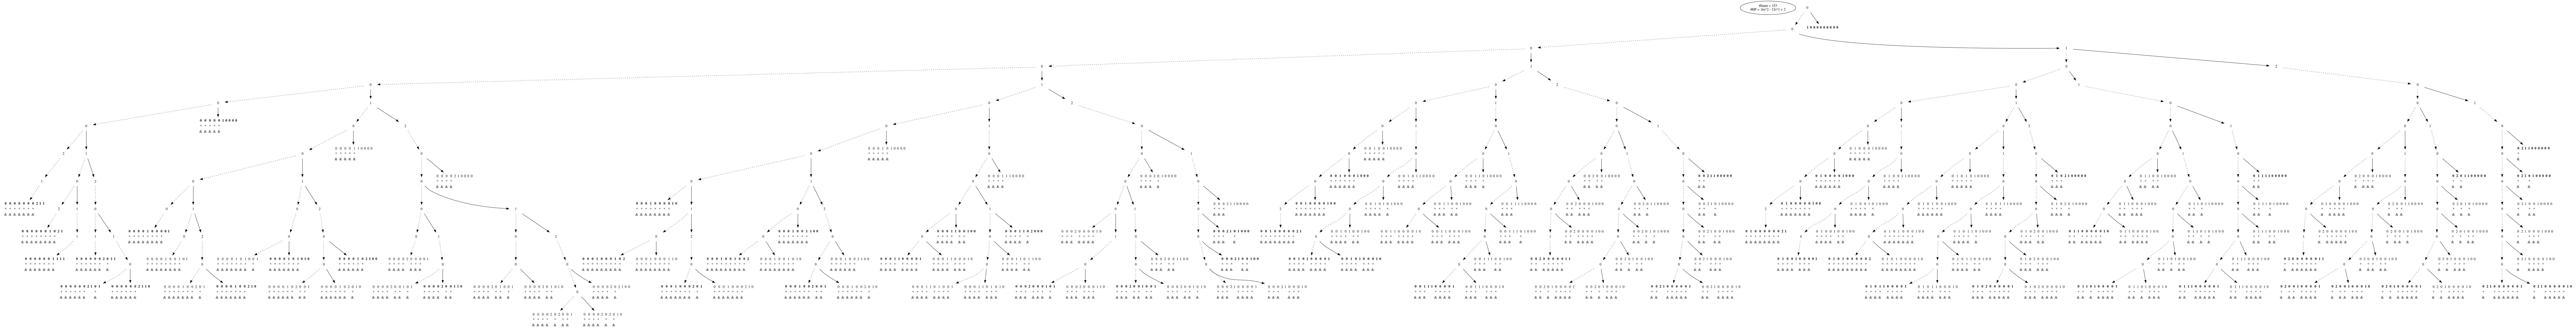

In [41]:
display.Image("./f633.png")